In [1]:
import pandas as pd
import numpy as np
import textblob as tb
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
df = pd.read_csv('../merged_df.csv')
df.head(5)

,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,Review_type,product_type
0,B00001OPGT-0000,3,case nice plenty pocket stuff office thin lapt...,76,0,0,0,0,37,0,bags_and_cases
1,B00001OPGT-0001,4,month toshiba laptop case strong thou side bag...,44,0,0,0,1,36,1,bags_and_cases
2,B00001OPGT-0002,4,pic product justice real thing good black synt...,26,0,0,0,5,33,1,bags_and_cases
3,B00001OPGT-0003,5,pavilion rrb thing laptop front pocket fit pow...,38,0,0,0,9,40,1,bags_and_cases
4,B00001OPGT-0004,5,happy bag expectation satellite adjustable pad...,32,0,0,0,3,25,1,bags_and_cases


In [3]:
df = df.dropna()

In [4]:
df

,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,Review_type,product_type
0,B00001OPGT-0000,3,case nice plenty pocket stuff office thin lapt...,76,0,0,0,0,37,0,bags_and_cases
1,B00001OPGT-0001,4,month toshiba laptop case strong thou side bag...,44,0,0,0,1,36,1,bags_and_cases
2,B00001OPGT-0002,4,pic product justice real thing good black synt...,26,0,0,0,5,33,1,bags_and_cases
3,B00001OPGT-0003,5,pavilion rrb thing laptop front pocket fit pow...,38,0,0,0,9,40,1,bags_and_cases
4,B00001OPGT-0004,5,happy bag expectation satellite adjustable pad...,32,0,0,0,3,25,1,bags_and_cases
...,...,...,...,...,...,...,...,...,...,...,...
13833,B00A7EQQ3O-0004,2,good nice leather good stitching keyboard dock...,26,0,0,0,4,12,0,bags_and_cases
13834,B00A7EQQ3O-0005,2,adequate case generic case suitable pad clunky...,17,0,0,0,0,10,0,bags_and_cases
13835,B00A7EQQ3O-0006,2,case fiance case targus brand tablet love case...,53,0,0,0,6,22,0,bags_and_cases
13836,B00A7EQQ3O-0007,2,nice protection padding thin tablet gumdrop ca...,26,0,0,0,1,13,0,bags_and_cases


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#### Calculating polarity and subjectivity of reviews

In [ ]:
from textblob import TextBlob

df['reviews']= df['reviews'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['reviews'].apply(pol)
df['subjectivity'] = df['reviews'].apply(sub)
df


,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,Review_type,polarity,subjectivity
0,B00001OPGT-0000,3,case nice plenty pocket stuff office thin lapt...,76,0,0,0.0,0,37,0,0.045833,0.618519
1,B00001OPGT-0001,4,month toshiba laptop case strong thou side bag...,44,0,0,0.0,1,36,1,0.400000,0.584821
2,B00001OPGT-0002,4,pic product justice real thing good black synt...,26,0,0,0.0,5,33,1,0.382993,0.570748
3,B00001OPGT-0003,5,pavilion rrb thing laptop front pocket fit pow...,38,0,0,0.0,9,40,1,0.301488,0.502976
4,B00001OPGT-0004,5,happy bag expectation satellite adjustable pad...,32,0,0,0.0,3,25,1,0.185714,0.610714
...,...,...,...,...,...,...,...,...,...,...,...,...
358267,B00J5UD0FI-0000,3,good machine decent quality good job corner ha...,19,0,0,0.0,0,18,0,0.522222,0.622222
358268,B00J5UD0FI-0001,4,model prior purchasing bobsweep roomba mop bat...,45,3,3,0.0,4,26,1,0.140000,0.460000
358269,B00J5UD0FI-0002,4,website manual cleaning day kitchen able fit r...,114,4,4,0.0,13,54,1,0.053509,0.393275
358270,B00J5UD0FI-0003,5,sterilize floor sweep floor good advertising s...,66,0,0,0.0,6,28,1,0.479762,0.660714


In [ ]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df

,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,Review_type,polarity,subjectivity
0,B00001OPGT-0000,3,case nice plenty pocket stuff office thin lapt...,76,0,0,0.0,0,37,0,0.05,0.62
1,B00001OPGT-0001,4,month toshiba laptop case strong thou side bag...,44,0,0,0.0,1,36,1,0.40,0.58
2,B00001OPGT-0002,4,pic product justice real thing good black synt...,26,0,0,0.0,5,33,1,0.38,0.57
3,B00001OPGT-0003,5,pavilion rrb thing laptop front pocket fit pow...,38,0,0,0.0,9,40,1,0.30,0.50
4,B00001OPGT-0004,5,happy bag expectation satellite adjustable pad...,32,0,0,0.0,3,25,1,0.19,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...
358267,B00J5UD0FI-0000,3,good machine decent quality good job corner ha...,19,0,0,0.0,0,18,0,0.52,0.62
358268,B00J5UD0FI-0001,4,model prior purchasing bobsweep roomba mop bat...,45,3,3,0.0,4,26,1,0.14,0.46
358269,B00J5UD0FI-0002,4,website manual cleaning day kitchen able fit r...,114,4,4,0.0,13,54,1,0.05,0.39
358270,B00J5UD0FI-0003,5,sterilize floor sweep floor good advertising s...,66,0,0,0.0,6,28,1,0.48,0.66


In [ ]:
#craete a df for storing the values for polarity and subjectivity
df2= pd.DataFrame()


In [ ]:
#add the values for these variables by taking the mean of scores w.r.t. ratings
for i in range (1,6):
  df2.loc[i,'polarity']= (df.loc[df.rating == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.loc[df.rating == i].subjectivity.mean())

In [ ]:
df2

,polarity,subjectivity
1,0.057177,0.486972
2,0.124016,0.502173
3,0.159487,0.513015
4,0.228778,0.530692
5,0.302129,0.559975


#### Plotting the graph for above results

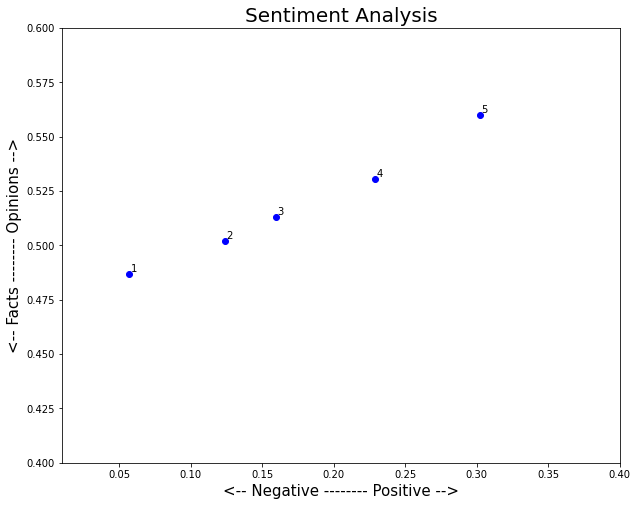

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df2.polarity.loc[index]
    y = df2.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(.01, .4) 
    plt.ylim(.4, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
#create a df for storing the values polarity and subjectivity for good review and bad review
df3= pd.DataFrame()
for i in range (0,2):
  df3.loc[i,'polarity']= (df.loc[df.Review_type == i].polarity.mean())
  df3.loc[i,'subjectivity']= (df.loc[df.Review_type == i].subjectivity.mean())
  
df3

,polarity,subjectivity
0,0.125250,0.503832
1,0.274587,0.548980


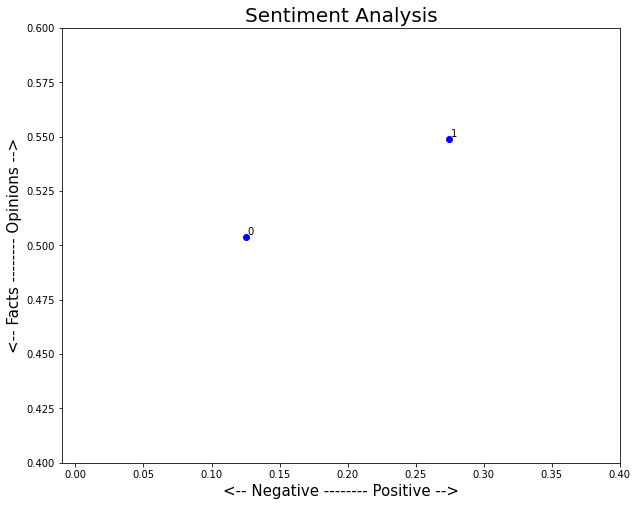

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, reviews in enumerate(df3.index):
    x = df3.polarity.loc[reviews]
    y = df3.subjectivity.loc[reviews]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(-.01, .4) 
    plt.ylim(.4, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

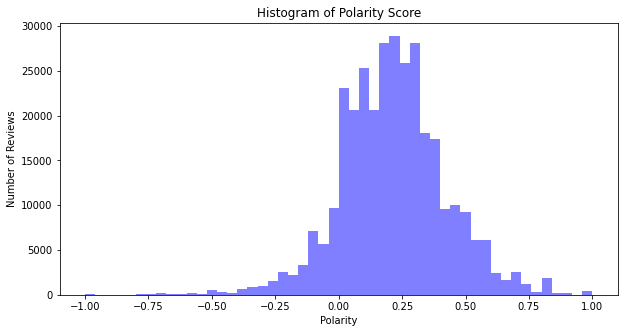

In [ ]:
#plot the polarity distribution over rreviews through histogram
num_bins = 50
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

We can see that the number of reviews are higher in the positive side with high polarity and number of reviews with low polarity is less.

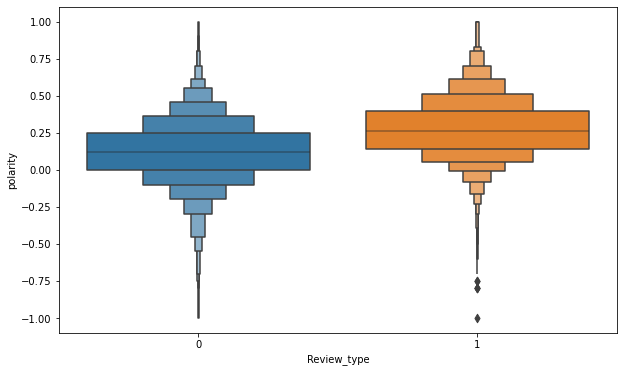

In [ ]:
#plotting the box plot of the polarity with good and  bad review
plt.figure(figsize=(10,6))
sns.boxenplot(x='Review_type', y='polarity', data=df)
plt.show();

In [ ]:
# checking the reviews with polarity 1 and with low rating i.e. bad review
df.loc[(df.polarity == 1 & (df.Review_type == 0))].reviews.head(10).tolist()

['sleeve ibook screen laptop computer powerbook ibook powerbook review',
 'previous several year repair company extended battery huge heavy new design worried small predecessor surprise expandable little junk drawer bottom wish big pocket front old handy main issue old bag backpack strap bit worried strap bad',
 'product family vacation targus case portable dvd player plenty room charger extra wire connecter plenty dvds product',
 'laptop additional storage pocket general entire case price case star long term durability information time',
 'poner laptop junto port aacute tile grande adelante llevo laptop tableta aacute excelente precio',
 'laptop case sturdy fall last one enough thinking husband laptop',
 'sturdy product numerical combination open sequence plenty room organizational compartment',
 'sleeve dell transport motorcycle month problem',
 'snug bag kind stuff camera strap bag little annoying camera fine internal sleeve carrier stuff external zipper sleeve plenty room extra bat

The above reviews are positive but they have low ratings

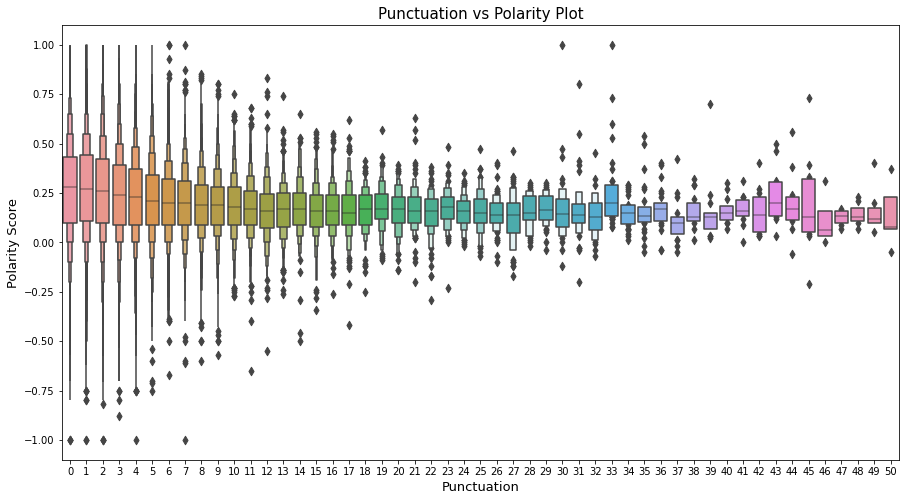

In [ ]:
#Plot the polarity with punctuation with box plot
plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='upper', y='polarity', data=df3)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show();

As we can see from the above graph that polarity is higher with low punctuation. There are many outliers but average polarity is around 0.25 combined negative and positive reviews.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of polarity Score')

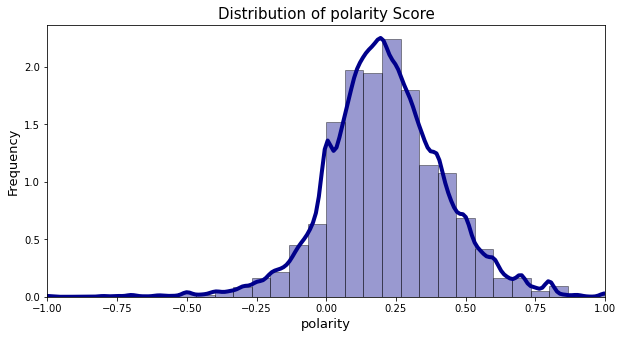

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-1.001,1.001])
plt.xlabel('polarity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of polarity Score', fontsize=15)

Subjectivity plots

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

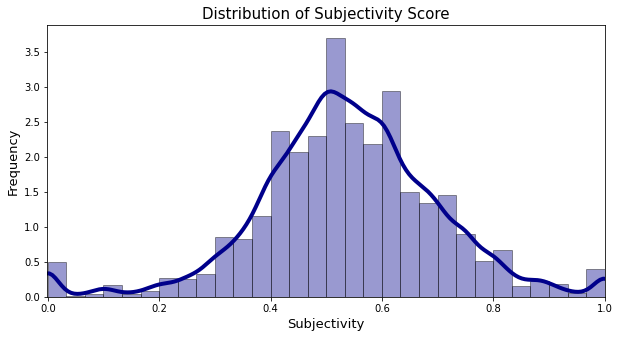

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

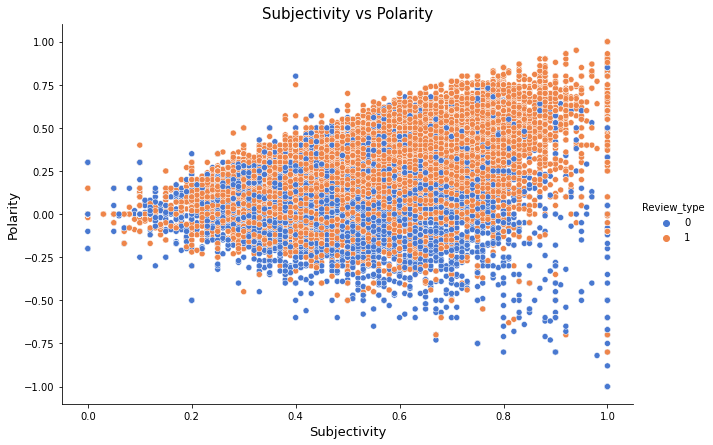

In [ ]:
#plot the scatterplot for Subjectivity vs Polarity 
sns.relplot(x="subjectivity", y="polarity", hue="Review_type", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

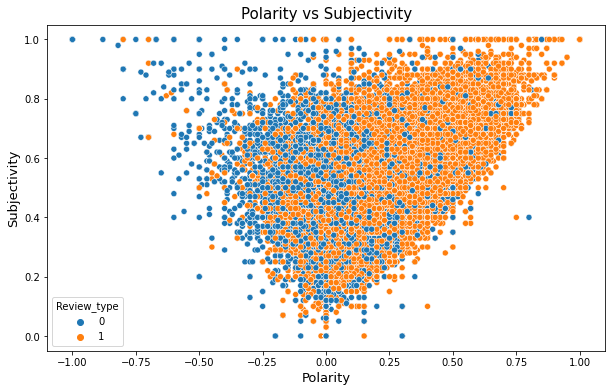

In [ ]:
#plot the scatterplot for Polarity vs Subjectivity
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Review_type", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

<function matplotlib.pyplot.show(close=None, block=None)>

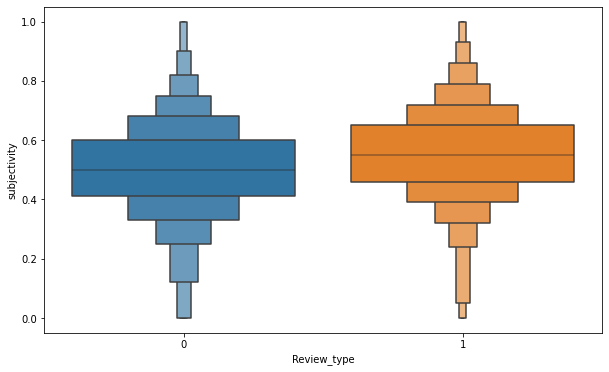

In [ ]:
# Box plot for subjectivity and review_type
plt.figure(figsize=(10,6))
sns.boxenplot(x='Review_type', y='subjectivity', data=df)
plt.show

#### Checking the reviews based on Review_type, polarity and subjectivity

In [ ]:
df.loc[(df["Review_type"] == 0) & (df.polarity == 1 ) & (df.subjectivity ==1), "reviews"].head(10).tolist()

['product design excellent item laptop state size laptop work shipment discover laptop design search bag',
 'case wonderful design wash bottle rain',
 'inch macbook pro macbook leather pant leather pant tear amazon wonderful customer service care return item',
 'protector slippery slip place surface bottom fitment perfect grab front laptop',
 'mine zip close bag people content bag mine work travel work handbag content outer zip perfect',
 'bag perfect velcro strap laptop place unusable',
 'item son school computer class supply perfect solution week use handle fabric replacement use shoulder strap week handle',
 'size perfect outer fabric handle grip month grip',
 'son perfect return seller thank amazon refunded money',
 'case awesome doubt week case bottom attach']

In [ ]:
df.loc[(df["Review_type"] == 1) & (df.polarity == 1 ) & (df.subjectivity ==1), "reviews"].head(10).tolist()

['son ton book backpack locker wheel oversized messenger bag vay bag perfect weight use stair school sturdy',
 'bag amazon year day week lot room excellent value price',
 'computer wonderful laptop grandchild perfect size phone wallet hesitation',
 'case compartment portable dvd player compartment mesh pocket perfect kindle',
 'excellent bag laptop accessory separate section file folder strap breeze carry computer',
 'laptop perfect well bag fan mouse instruction accessory bag bulky backpack laptop',
 'case macbook fifth year show tear look leather case awesome ton compliment',
 'impressed backpack weekend work morning noticed worker model year',
 'backpack wife laptop defect impressive construction withstand year usage lot backpack lifestyle lot',
 'pack year grad school lot weekend trip trip home use laptop work perfect swissgear']

In [ ]:
df.loc[(df["Review_type"] == 1) & (df.polarity == -1 ) & (df.subjectivity ==1), "reviews"].head(10).tolist()

['backpack time helpful paperwork laptop bag laptop hand terrible']

#### Lets start the creating the model traing and prediction

In [6]:
from sklearn.model_selection import train_test_split

y= df.Review_type.values 
X= df.reviews

X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.33, random_state = 820) 


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9271,) (9271,)
(4567,) (4567,)


#### Convert reviews to a matrix of TF-IDF features

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfi = TfidfVectorizer(ngram_range=(1,3), max_features = 2000)

X_train_tfi = tfi.fit_transform(X_train).toarray() 
X_test_tfi = tfi.transform(X_test).toarray()

#### Model training, prediction and metrics

In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

cv_list = []

def create_model(model_list):
    for model in model_list:
        cv= model.fit(X_train_tfi, y_train)
        
        cv_list.append(cv)
        # predicting test set results 
        y_pred = model.predict(X_test_tfi)

        # making the confusion matrix 
        cm = confusion_matrix(y_test, y_pred) 

        print()
        print("<--- Results for model ---> " + str(model))
        print()
        
        print("Confusion matrix ")
        print(cm)
        print()
        
        print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
        print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
        print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
        print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))
        

In [ ]:
model_list = [LogisticRegression(max_iter=1000), GaussianNB(), MultinomialNB(), BernoulliNB() ]
create_model(model_list)


<--- Results for model ---> LogisticRegression(max_iter=1000)

Confusion matrix 
[[23320 11890]
 [ 6551 65383]]

Accuracy score: 0.83
Precision score: 0.85
Recall score: 0.91
F1 score: 0.83

<--- Results for model ---> GaussianNB()

Confusion matrix 
[[26583  8627]
 [19289 52645]]

Accuracy score: 0.74
Precision score: 0.86
Recall score: 0.73
F1 score: 0.74

<--- Results for model ---> MultinomialNB()

Confusion matrix 
[[15536 19674]
 [ 3605 68329]]

Accuracy score: 0.78
Precision score: 0.78
Recall score: 0.95
F1 score: 0.78

<--- Results for model ---> BernoulliNB()

Confusion matrix 
[[24351 10859]
 [12437 59497]]

Accuracy score: 0.78
Precision score: 0.85
Recall score: 0.83
F1 score: 0.78


In [ ]:
cv_logreg = cv_list[0]
cv_gaussian = cv_list[1]
cv_mn = cv_list[2]
cv_ber= cv_list[3]

#### Calculating roc_auc score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y_score1 = cv_logreg.predict_proba(X_test_tfi)[:,1]
y_score2 = cv_gaussian.predict_proba(X_test_tfi)[:,1]
y_score3 = cv_mn.predict_proba(X_test_tfi)[:,1]
y_score4 = cv_ber.predict_proba(X_test_tfi)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)

print('roc_auc_score for Logistic Regression: {0:0.2f}'.format (roc_auc_score(y_test, y_score1)))
print('roc_auc_score for Gaussian NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score2)))
print('roc_auc_score for Multinominal NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score3)))
print('roc_auc_score for Bernoulli NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score4)))


roc_auc_score for Logistic Regression: 0.89
roc_auc_score for Gaussian NB: 0.79
roc_auc_score for Multinominal NB: 0.85
roc_auc_score for Bernoulli NB: 0.84


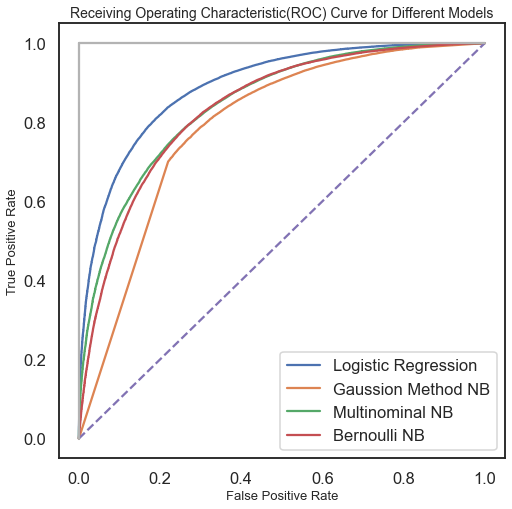

In [ ]:
#Plotting roc-auc curve for all the models
sns.set(style="white", color_codes=True)
sns.set_context("talk")
plt.figure(figsize= (8,8))

plt.plot(false_positive_rate1, true_positive_rate1, label="Logistic Regression")
plt.plot(false_positive_rate2, true_positive_rate2, label="Gaussion Method NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Multinominal NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Bernoulli NB")

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic(ROC) Curve for Different Models', fontsize= 14)
plt.legend()
plt.show()

In [ ]:
df

,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count,Review_type,polarity,subjectivity
0,B00001OPGT-0000,3,case nice plenty pocket stuff office thin lapt...,76,0,0,0.0,0,37,0,0.05,0.62
1,B00001OPGT-0001,4,month toshiba laptop case strong thou side bag...,44,0,0,0.0,1,36,1,0.40,0.58
2,B00001OPGT-0002,4,pic product justice real thing good black synt...,26,0,0,0.0,5,33,1,0.38,0.57
3,B00001OPGT-0003,5,pavilion rrb thing laptop front pocket fit pow...,38,0,0,0.0,9,40,1,0.30,0.50
4,B00001OPGT-0004,5,happy bag expectation satellite adjustable pad...,32,0,0,0.0,3,25,1,0.19,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...
358267,B00J5UD0FI-0000,3,good machine decent quality good job corner ha...,19,0,0,0.0,0,18,0,0.52,0.62
358268,B00J5UD0FI-0001,4,model prior purchasing bobsweep roomba mop bat...,45,3,3,0.0,4,26,1,0.14,0.46
358269,B00J5UD0FI-0002,4,website manual cleaning day kitchen able fit r...,114,4,4,0.0,13,54,1,0.05,0.39
358270,B00J5UD0FI-0003,5,sterilize floor sweep floor good advertising s...,66,0,0,0.0,6,28,1,0.48,0.66


In [ ]:
df['Sentiment']= df.polarity
df.Sentiment[df.polarity <= 0] = 0 #negative
df.Sentiment[df.polarity > 0] = 1 #positive

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_3998/3960801567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sentiment[df.polarity <= 0] = 0 #negative
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_3998/3960801567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sentiment[df.polarity > 0] = 1 #positive


In [ ]:
df.to_csv('mergedDF_after_SentimentAnalysis.csv', index=False)

#### Using Ensemble methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(X_train_tfi, y_train)
y_pred = clf1.predict(X_test_tfi)
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

In [12]:
from sklearn.ensemble import BaggingClassifier

# Multiple logistic regression classifiers using bagging Classifier.
# Number of logistic regression classifiers we are using here are 400.
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = 90)
logbagClf.fit(X_train_tfi, y_train)
y_pred = logbagClf.predict(X_test_tfi)
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.82
Precision score: 0.82
Recall score: 0.95
F1 score: 0.82


In [10]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
#nbclf = GaussianNB(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train_tfi, y_train)
y_pred = clf2.predict(X_test_tfi)
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.82
Precision score: 0.83
Recall score: 0.95
F1 score: 0.82


In [9]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train_tfi,y_train)
y_pred = xgb_clf.predict(X_test_tfi)
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.79
Precision score: 0.79
Recall score: 0.97
F1 score: 0.79
